In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os, sys

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Load the dataset

In [4]:
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../Scripts'))
sys.path.append(scripts_path)

In [ ]:
from path import PATH_PROCESSED_CSV

In [7]:
data = pd.read_csv(PATH_PROCESSED_CSV) 

In [8]:
data

,Etat,Milieage,Carburant,CarVendeur,Portes,seats,CarNameV2,Modele,Price,etatCategory,...,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2
0,Bon prix,84100.0,Diesel,Professionnel,5.0,5.0,Mercedes,A 180,169005,2,...,85.0,Boîte manuelle,1461.0,8.0,1425.0,116.0,Euro 6d,Diesel,3.8,106.0
1,Bon prix,40671.0,Essence,Professionnel,5.0,5.0,Mercedes,GLA 180,179505,2,...,90.0,Boîte manuelle,1595.0,9.0,1295.0,122.0,Euro 6,Essence,5.7,133.0
2,Bon prix,69636.0,Essence,Professionnel,5.0,5.0,Mercedes,A 180,159905,2,...,90.0,Boîte manuelle,1595.0,9.0,1360.0,122.0,Euro 6b,Essence,5.2,120.0
3,Pas d'information,11998.0,Electrique/Essence,Professionnel,5.0,4.0,Mercedes,E 53 AMG,10999015,0,...,430.0,Boîte automatique,2999.0,4.0,NaN,585.0,NaN,Électrique,NaN,22.0
4,Bon prix,71300.0,Essence,Professionnel,5.0,5.0,Mercedes,GLC 250,3150015,2,...,155.0,Boîte automatique,1991.0,1.0,1805.0,211.0,Euro 6d,NaN,7.1,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,Prix correct,135061.0,Diesel,Professionnel,5.0,4.0,Volkswagen,Caddy,1999915,1,...,110.0,Boîte automatique,2000.0,1.0,1789.0,150.0,NaN,Diesel,NaN,149.0
10651,Pas d'information,44779.0,Essence,Professionnel,5.0,4.0,Volkswagen,Caddy,174905,0,...,62.0,Boîte manuelle,1197.0,6.0,1350.0,84.0,Euro 6b,Essence,6.1,139.0
10652,Prix correct,181161.0,Essence,Professionnel,5.0,5.0,Volkswagen,Tiguan,109505,1,...,118.0,Boîte manuelle,1390.0,1.0,1546.0,160.0,Euro 5,NaN,7.6,156.0
10653,Prix correct,166361.0,Diesel,Professionnel,4.0,2.0,Volkswagen,Beetle,104505,1,...,77.0,Boîte manuelle,1598.0,7.0,1462.0,105.0,Euro 5,Diesel,4.7,124.0


## 1 -  Copy les donnes

In [9]:
data2 = data.copy()

In [10]:
data2.drop("Price", axis=1, inplace=True)

## 2 - feature engineering

In [62]:
import pandas as pd
from datetime import datetime

current_year = datetime.now().year

# Create the 'Car Age' feature
data2['CarAge'] = current_year - data2['Year']

In [63]:
data2.describe(include = "all")

,Etat,Milieage,Carburant,CarVendeur,Portes,seats,CarNameV2,Modele,etatCategory,Month,...,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2,CarAge
count,10655,1.061100e+04,10655,10655,9964.000000,10235.000000,10655,10613,10655.000000,10380.000000,...,10221,9844.000000,10627.000000,7440.000000,10608.000000,7900,9706,6413.000000,7565.000000,10380.000000
unique,4,NaN,9,2,NaN,NaN,43,713,NaN,NaN,...,2,NaN,NaN,NaN,NaN,10,3,NaN,NaN,NaN
top,Pas d'information,NaN,Essence,Professionnel,NaN,NaN,Volkswagen,Polo,NaN,NaN,...,Boîte manuelle,NaN,NaN,NaN,NaN,Euro 6d,Essence,NaN,NaN,NaN
freq,3198,NaN,6541,8317,NaN,NaN,1235,467,NaN,NaN,...,5757,NaN,NaN,NaN,NaN,3153,6201,NaN,NaN,NaN
mean,NaN,8.199328e+04,NaN,NaN,4.678643,4.363361,NaN,NaN,1.333271,5.881503,...,NaN,1771.591528,4.487908,1619.479435,165.526301,NaN,NaN,5.787260,128.042829,8.423988
std,NaN,6.804044e+04,NaN,NaN,0.959222,1.060495,NaN,NaN,1.098558,3.434749,...,NaN,960.403766,3.062791,800.641415,124.033426,NaN,NaN,2.381026,69.332322,7.947117
min,NaN,0.000000e+00,NaN,NaN,1.000000,2.000000,NaN,NaN,0.000000,1.000000,...,NaN,0.000000,1.000000,980.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,3.145700e+04,NaN,NaN,5.000000,4.000000,NaN,NaN,0.000000,3.000000,...,NaN,1199.000000,1.000000,1190.000000,101.000000,NaN,NaN,4.600000,106.000000,4.000000
50%,NaN,7.000000e+04,NaN,NaN,5.000000,5.000000,NaN,NaN,1.000000,6.000000,...,NaN,1498.000000,5.000000,1395.000000,131.000000,NaN,NaN,5.300000,125.000000,6.000000
75%,NaN,1.190000e+05,NaN,NaN,5.000000,5.000000,NaN,NaN,2.000000,9.000000,...,NaN,1984.000000,7.000000,1641.250000,165.000000,NaN,NaN,6.300000,147.000000,11.000000


<Axes: >

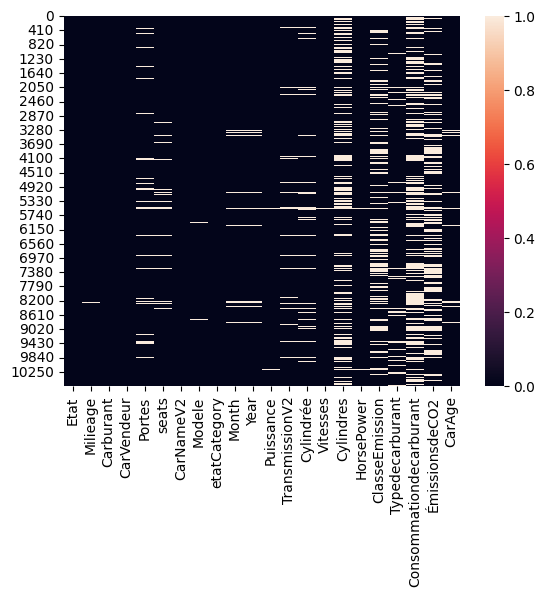

In [64]:
sns.heatmap(data2.isna())

In [65]:
(data2.isna().sum() / data2.shape[0]) * 100

Etat                        0.000000
Milieage                    0.412952
Carburant                   0.000000
CarVendeur                  0.000000
Portes                      6.485218
seats                       3.941811
CarNameV2                   0.000000
Modele                      0.394181
etatCategory                0.000000
Month                       2.580948
Year                        2.580948
Puissance                   0.488034
TransmissionV2              4.073205
Cylindrée                   7.611450
Vitesses                    0.262787
Cylindres                  30.173627
HorsePower                  0.441107
ClasseEmission             25.856405
Typedecarburant             8.906617
Consommationdecarburant    39.812295
ÉmissionsdeCO2             29.000469
CarAge                      2.580948
dtype: float64

* Consommationdecarburant and Cylindres have mny nan values

In [66]:
categorie_columns = data2.select_dtypes(exclude = np.number).columns
number_columns    = data2.select_dtypes(include = np.number).columns

In [67]:
categorie_columns

Index(['Etat', 'Carburant', 'CarVendeur', 'CarNameV2', 'Modele',
       'TransmissionV2', 'ClasseEmission', 'Typedecarburant'],
      dtype='object')

In [68]:
number_columns

Index(['Milieage', 'Portes', 'seats', 'etatCategory', 'Month', 'Year',
       'Puissance', 'Cylindrée', 'Vitesses', 'Cylindres', 'HorsePower',
       'Consommationdecarburant', 'ÉmissionsdeCO2', 'CarAge'],
      dtype='object')

#### check nan values for numbers  and categorical column

In [69]:
numbers_nans = list(number_columns[data2.select_dtypes(include = np.number).isna().sum() != 0])
categor_nans = list(categorie_columns[data2.select_dtypes(exclude = np.number).isna().sum() != 0])

In [70]:
numbers_nans

['Milieage',
 'Portes',
 'seats',
 'Month',
 'Year',
 'Puissance',
 'Cylindrée',
 'Vitesses',
 'Cylindres',
 'HorsePower',
 'Consommationdecarburant',
 'ÉmissionsdeCO2',
 'CarAge']

In [71]:
categor_nans

['Modele', 'TransmissionV2', 'ClasseEmission', 'Typedecarburant']

#### Function to Handle Nan Values Categories

In [72]:
def fill_missing_categorical(df, columns, strategy="mode", fill_value="missing"):
    df_filled = df.copy()
    for col in columns:
        if strategy == "mode":
            most_frequent = df_filled[col].mode()[0] 
            df_filled[col] = df_filled[col].fillna(most_frequent)
        elif strategy == "constant":
            df_filled[col] = df_filled[col].fillna(fill_value)
        else:
            raise ValueError("Stratégie non reconnue. Utilisez 'mode' ou 'constant'.")
    return df_filled

#### Function to Handle Nan Values Numerical

In [73]:
def fill_missing_numerical(df, columns, strategy="mean", fill_value=0):
    df_filled = df.copy()
    for col in columns:
        if strategy == "mean":
            df_filled[col] = df_filled[col].fillna(df_filled[col].mean())  
        elif strategy == "median":
            df_filled[col] = df_filled[col].fillna(df_filled[col].median())  
        elif strategy == "constant":
            df_filled[col] = df_filled[col].fillna(fill_value) 
        else:
            raise ValueError("Stratégie non reconnue. Utilisez 'mean', 'median' ou 'constant'.")
    return df_filled

#### Function to transform categrocail data into numbers

In [74]:
def transform_columns(df, transformer, columns):
    df_transformed = df.copy()
    for col in columns:
        if isinstance(transformer, OneHotEncoder):
            enc = OneHotEncoder(drop='first', sparse_output=False)
            transformed = enc.fit_transform(df_transformed[[col]])
            encoded_df = pd.DataFrame(transformed, columns=enc.get_feature_names_out([col]))
            df_transformed = df_transformed.drop(columns=[col]).join(encoded_df)
        elif isinstance(transformer, LabelEncoder):
            enc = LabelEncoder()
            df_transformed[col] = enc.fit_transform(df_transformed[col])
    return df_transformed

#### Function for normalisation

In [76]:
def normalize_numerical(df, columns, method="standard"):
    df_normalized = df.copy()
    if method == "standard":
        scaler = StandardScaler()  
    elif method == "minmax":
        scaler = MinMaxScaler()  
    elif method == "robust":
        scaler = RobustScaler()  
    else:
        raise ValueError("Méthode non reconnue. Utilisez 'standard', 'minmax' ou 'robust'.")
 
    df_normalized[columns] = scaler.fit_transform(df_normalized[columns])
    return df_normalized

In [77]:
df = fill_missing_numerical(data2, numbers_nans)
df = fill_missing_categorical(df, categor_nans)

In [78]:
df.isna().sum()

Etat                       0
Milieage                   0
Carburant                  0
CarVendeur                 0
Portes                     0
seats                      0
CarNameV2                  0
Modele                     0
etatCategory               0
Month                      0
Year                       0
Puissance                  0
TransmissionV2             0
Cylindrée                  0
Vitesses                   0
Cylindres                  0
HorsePower                 0
ClasseEmission             0
Typedecarburant            0
Consommationdecarburant    0
ÉmissionsdeCO2             0
CarAge                     0
dtype: int64

In [79]:
df = transform_columns(df, LabelEncoder(), categorie_columns)

In [80]:
df = normalize_numerical(df, number_columns)

In [81]:
df.head()

,Etat,Milieage,Carburant,CarVendeur,Portes,seats,CarNameV2,Modele,etatCategory,Month,...,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2,CarAge
0,0,0.031028,3,1,0.346458,0.612546,26,95,0.606942,0.919918,...,1,-0.336472,1.148260,-2.907067e-01,-0.400200,8,0,-1.075896,-0.377340,-0.309044
1,0,-0.608606,7,1,0.346458,0.612546,26,345,0.606942,-0.850008,...,1,-0.191306,1.475205,-4.850300e-01,-0.351717,5,1,-0.047242,0.084859,-0.054056
2,0,-0.182001,7,1,0.346458,0.612546,26,95,0.606942,0.329943,...,1,-0.191306,1.475205,-3.878683e-01,-0.351717,6,1,-0.317941,-0.137681,-0.181550
3,1,-1.030910,6,1,0.346458,-0.349610,26,297,-1.213713,0.329943,...,0,1.329683,-0.159519,3.398768e-16,3.389584,8,2,0.000000,-1.815292,-0.946513
4,0,-0.157494,7,1,0.346458,0.612546,26,354,0.606942,0.624931,...,0,0.237691,-1.140354,2.773151e-01,0.367453,8,1,0.710713,0.581295,-0.309044


In [82]:
X = df
Y = data["Price"]

#### Split data

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=11)

#### Forst Model

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 11641712149644.215
R^2 Score: 0.39463714959218765


#### RandomForestRegressor

In [102]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=14)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R^2 Score:", r2_rf)

Random Forest - Mean Squared Error: 5334968018659.337
Random Forest - R^2 Score: 0.7225844957256706


#### XGBoost 

In [88]:
import xgboost as xgb

In [101]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 10, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost - Mean Squared Error:", mse_xgb)
print("XGBoost - R^2 Score:", r2_xgb)

XGBoost - Mean Squared Error: 4438556672000.0
XGBoost - R^2 Score: 0.769197404384613
